# Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,recall_score,precision_score



# Data Collection

df = pd.read_excel('superstore_sales.xlsx')
df.head(10)

# Information About DataSet

In [28]:
df.shape

(51290, 16)

In [29]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'market', 'region', 'product_id', 'category',
       'order_priority', 'cost price', 'quantity', 'discount percent',
       'profit', 'shipping_cost'],
      dtype='object')

### Features

##### 1. Order_ID :- Unique Value assigned to each Order.


##### 2. Order Date :- Date On which Order was made.


##### 3. Ship Date :- Date on which the Product was delivered.


##### 4. Ship Mode :- Type of Class Through which the Product was delivered.


##### 5. Customer Name :- Name of the Customer.


##### 6. Segment :- Purpose for which the Product was ordered. (Consumer/Home/Corporate).


##### 7. Market :- Place from where the Product was brought to the Store.


##### 8. Region :- Place where the Product was delivered.


##### 9. Product Id :- Unique Value for each Product.


##### 10. Category :- Type of the Product (Technology/Furniture, etc.).


##### 11. Order Priority :- How important an Order is.


##### 12. Cost Price :- Price of Each Product. (USD)


##### 13. Quantity :- Number of Products bought.


##### 14. Discount Percent :- Percentage of Discount given on that Product.


##### 15. Profit :- Profit Earned by selling that Product. It is negative if there is loss. (USD)


##### 16. Shipping Cost :- Cost for delivering the Product. (USD)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51290 non-null  object        
 1   order_date        51290 non-null  datetime64[ns]
 2   ship_date         51290 non-null  datetime64[ns]
 3   ship_mode         51290 non-null  object        
 4   customer_name     51290 non-null  object        
 5   segment           51290 non-null  object        
 6   market            51290 non-null  object        
 7   region            51290 non-null  object        
 8   product_id        51290 non-null  object        
 9   category          51290 non-null  object        
 10  order_priority    51290 non-null  object        
 11  cost price        51290 non-null  float64       
 12  quantity          51290 non-null  int64         
 13  discount percent  51290 non-null  float64       
 14  profit            5129

In [31]:
df.describe()

,cost price,quantity,discount percent,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818
std,487.565361,2.278766,0.212280,174.424113,57.296810
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


## Data Preparation for Exploratory Data Analysis

##### Here, there are certain columns which do not contribute to the Target Variable

In [32]:
df.drop(['order_id','customer_name','product_id'],axis=1,inplace=True)

In [33]:
df.columns

Index(['order_date', 'ship_date', 'ship_mode', 'segment', 'market', 'region',
       'category', 'order_priority', 'cost price', 'quantity',
       'discount percent', 'profit', 'shipping_cost'],
      dtype='object')

#### Now Order_Date and Ship_Date can be made as 1 feature as Number of days to Ship the Product

In [34]:
df['Days to Ship'] = df['ship_date'].sub(df['order_date'], axis=0)
df.head()

,order_date,ship_date,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,profit,shipping_cost,Days to Ship
0,2011-01-01,2011-01-06,Standard Class,Consumer,Africa,Africa,Office Supplies,Medium,408.300,2,0.0,106.140,35.46,5 days
1,2011-01-01,2011-01-08,Standard Class,Consumer,APAC,Oceania,Office Supplies,Medium,120.366,3,0.1,36.036,9.72,7 days
2,2011-01-01,2011-01-05,Second Class,Consumer,EMEA,EMEA,Office Supplies,High,66.120,4,0.0,29.640,8.17,4 days
3,2011-01-01,2011-01-05,Second Class,Home Office,EU,North,Office Supplies,High,44.865,3,0.5,-26.055,4.82,4 days
4,2011-01-01,2011-01-08,Standard Class,Consumer,APAC,Oceania,Furniture,Medium,113.670,5,0.1,37.770,4.70,7 days


In [35]:
df['Days to Ship'].dtypes

dtype('<m8[ns]')

#### Considering Only Days for Days to Ship, Because it is Time Delta

In [36]:
df['Days to Ship'] = pd.DataFrame([i.days for i in df['Days to Ship']])
df.head()

,order_date,ship_date,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,profit,shipping_cost,Days to Ship
0,2011-01-01,2011-01-06,Standard Class,Consumer,Africa,Africa,Office Supplies,Medium,408.300,2,0.0,106.140,35.46,5
1,2011-01-01,2011-01-08,Standard Class,Consumer,APAC,Oceania,Office Supplies,Medium,120.366,3,0.1,36.036,9.72,7
2,2011-01-01,2011-01-05,Second Class,Consumer,EMEA,EMEA,Office Supplies,High,66.120,4,0.0,29.640,8.17,4
3,2011-01-01,2011-01-05,Second Class,Home Office,EU,North,Office Supplies,High,44.865,3,0.5,-26.055,4.82,4
4,2011-01-01,2011-01-08,Standard Class,Consumer,APAC,Oceania,Furniture,Medium,113.670,5,0.1,37.770,4.70,7


#### Now Removing the Order_Date and Ship_date from the dataset

In [37]:
df.drop(['order_date','ship_date'],axis=1,inplace=True)

In [38]:
df.head()

,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,profit,shipping_cost,Days to Ship
0,Standard Class,Consumer,Africa,Africa,Office Supplies,Medium,408.300,2,0.0,106.140,35.46,5
1,Standard Class,Consumer,APAC,Oceania,Office Supplies,Medium,120.366,3,0.1,36.036,9.72,7
2,Second Class,Consumer,EMEA,EMEA,Office Supplies,High,66.120,4,0.0,29.640,8.17,4
3,Second Class,Home Office,EU,North,Office Supplies,High,44.865,3,0.5,-26.055,4.82,4
4,Standard Class,Consumer,APAC,Oceania,Furniture,Medium,113.670,5,0.1,37.770,4.70,7


#### Creating The Selling Price Variable 

###### Selling Price = (CostPrice*Quantity) - (DiscountPercent*CostPrice*Quantity) + Profit

In [39]:
df['Selling Price'] = (df['cost price']*df['quantity']) - (df['discount percent']*(df['cost price']*df['quantity'])) + df['profit']

In [40]:
df.head()

,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,profit,shipping_cost,Days to Ship,Selling Price
0,Standard Class,Consumer,Africa,Africa,Office Supplies,Medium,408.300,2,0.0,106.140,35.46,5,922.7400
1,Standard Class,Consumer,APAC,Oceania,Office Supplies,Medium,120.366,3,0.1,36.036,9.72,7,361.0242
2,Second Class,Consumer,EMEA,EMEA,Office Supplies,High,66.120,4,0.0,29.640,8.17,4,294.1200
3,Second Class,Home Office,EU,North,Office Supplies,High,44.865,3,0.5,-26.055,4.82,4,41.2425
4,Standard Class,Consumer,APAC,Oceania,Furniture,Medium,113.670,5,0.1,37.770,4.70,7,549.2850


#### Converting Numerical Selling Price into Two Classes (Highly/Least Contributing) Using Median Value

In [41]:
df['Selling Price'].describe()

count     51290.000000
mean       1104.996539
std        3264.225602
min       -1591.459200
25%          53.797450
50%         216.600000
75%         814.298400
max      133551.990000
Name: Selling Price, dtype: float64

In [42]:
one_ = df['Selling Price'].describe()['75%']
two_ = df['Selling Price'].describe()['50%']
three_ = df['Selling Price'].describe()['25%']


def num_to_cat(i):
    
    if i>=one_:
        return 1 # Highly Contributing
    elif i<one_ and i>=two_:
        return 2 # Above Average Contributing
    elif i<two_ and i>=three_:
        return 3 # Below Average Contributing
    else:
        return 4 # Least Contributing


In [43]:
df['Classes'] = df['Selling Price'].apply(num_to_cat)

In [44]:
df.head()

,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,profit,shipping_cost,Days to Ship,Selling Price,Classes
0,Standard Class,Consumer,Africa,Africa,Office Supplies,Medium,408.300,2,0.0,106.140,35.46,5,922.7400,1
1,Standard Class,Consumer,APAC,Oceania,Office Supplies,Medium,120.366,3,0.1,36.036,9.72,7,361.0242,2
2,Second Class,Consumer,EMEA,EMEA,Office Supplies,High,66.120,4,0.0,29.640,8.17,4,294.1200,2
3,Second Class,Home Office,EU,North,Office Supplies,High,44.865,3,0.5,-26.055,4.82,4,41.2425,4
4,Standard Class,Consumer,APAC,Oceania,Furniture,Medium,113.670,5,0.1,37.770,4.70,7,549.2850,2


#### Now we can Drop the Selling Price Column.

In [45]:
df.drop('Selling Price',axis=1,inplace=True)

In [46]:
df.head()

,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,profit,shipping_cost,Days to Ship,Classes
0,Standard Class,Consumer,Africa,Africa,Office Supplies,Medium,408.300,2,0.0,106.140,35.46,5,1
1,Standard Class,Consumer,APAC,Oceania,Office Supplies,Medium,120.366,3,0.1,36.036,9.72,7,2
2,Second Class,Consumer,EMEA,EMEA,Office Supplies,High,66.120,4,0.0,29.640,8.17,4,2
3,Second Class,Home Office,EU,North,Office Supplies,High,44.865,3,0.5,-26.055,4.82,4,4
4,Standard Class,Consumer,APAC,Oceania,Furniture,Medium,113.670,5,0.1,37.770,4.70,7,2


### Now the DataSet is Ready For EDA

## Exploratory Data Analysis

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ship_mode         51290 non-null  object 
 1   segment           51290 non-null  object 
 2   market            51290 non-null  object 
 3   region            51290 non-null  object 
 4   category          51290 non-null  object 
 5   order_priority    51290 non-null  object 
 6   cost price        51290 non-null  float64
 7   quantity          51290 non-null  int64  
 8   discount percent  51290 non-null  float64
 9   profit            51290 non-null  float64
 10  shipping_cost     51290 non-null  float64
 11  Days to Ship      51290 non-null  int64  
 12  Classes           51290 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 5.1+ MB


### Ship_mode

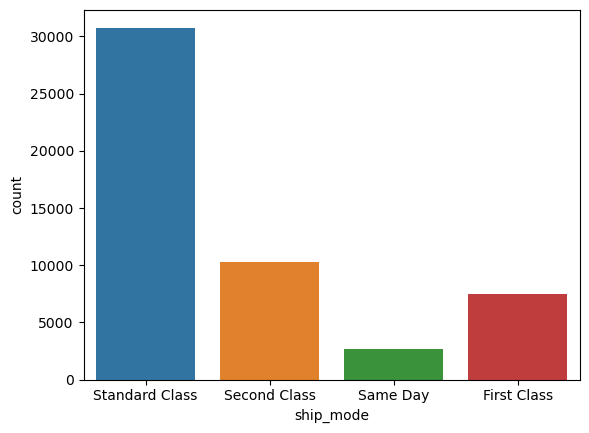

In [48]:
sns.countplot(df['ship_mode'])
plt.show()

##### More number of Customers are ordering the Products Through Standard Class

### Ship_mode Vs Classes

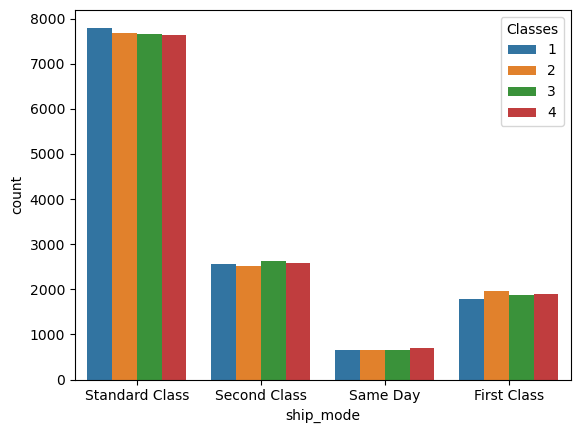

In [49]:
sns.countplot(df['ship_mode'],hue=df['Classes'])
plt.show()

##### This shows that, in all the shipment modes, the highly contributing people are almost equal to the Least Contributing People.

### Ship_mode Vs Segment

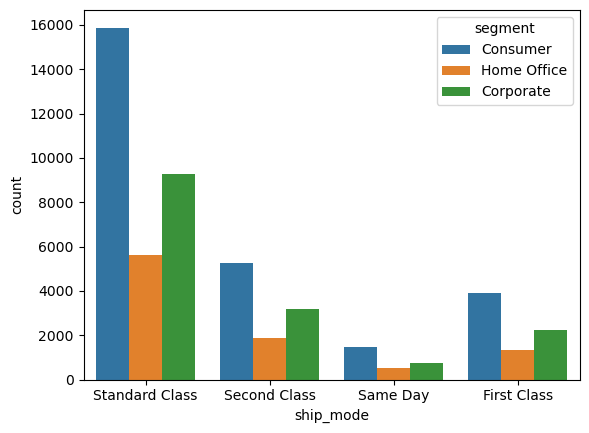

In [50]:
sns.countplot(df['ship_mode'],hue=df['segment'])
plt.show()

##### More Consumer Type Customers are ordering the Products in the Standard Class.
##### Least Number of Customers in Home Office Segment Ordering the Same Day Mode.

### Segment

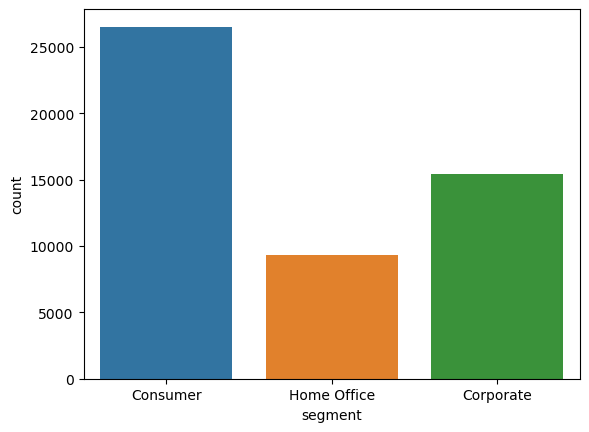

In [51]:
sns.countplot(df['segment'])
plt.show()

##### More number of Customers are from Consumer Segment and the less number of customers are from Home Office Segment

### Segment Vs Classes

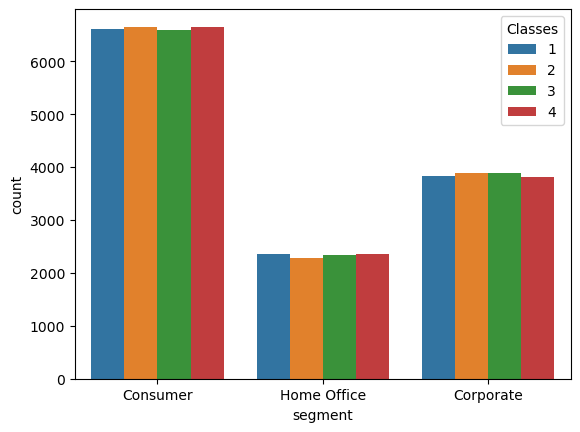

In [52]:
sns.countplot(df['segment'],hue=df['Classes'])
plt.show()

##### From the Above graph, all the Classes are almost equal in number for each segment

### Segment Vs Market

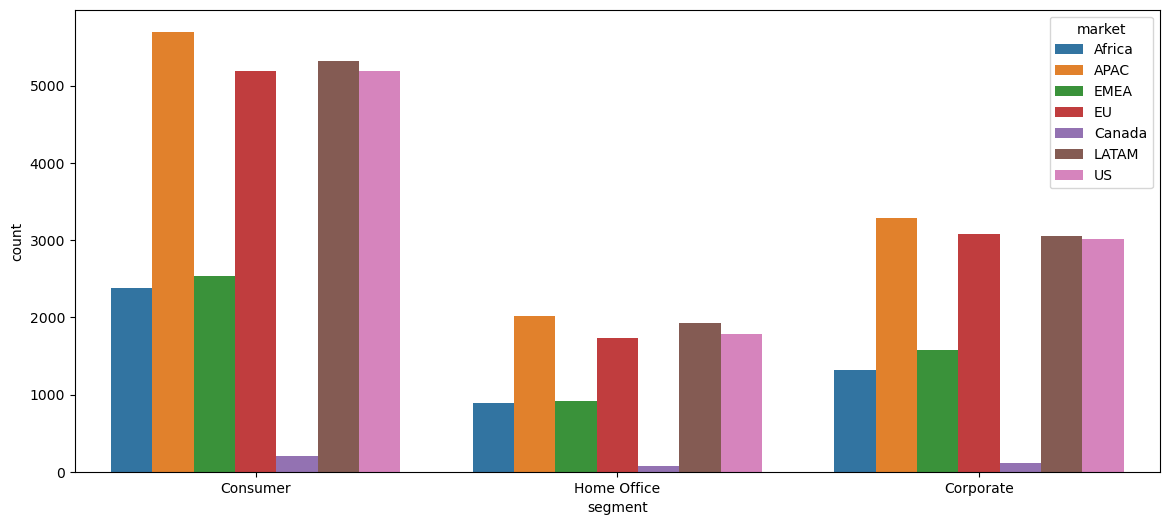

In [53]:
plt.figure(figsize=(14,6))
sns.countplot(df['segment'],hue=df['market'])
plt.show()

##### More number of Customers are from Consumer Segment bought products from APAC Market
##### Least number of Customers are from Home Office Segment bought products from Canada Market

### Segment Vs Category

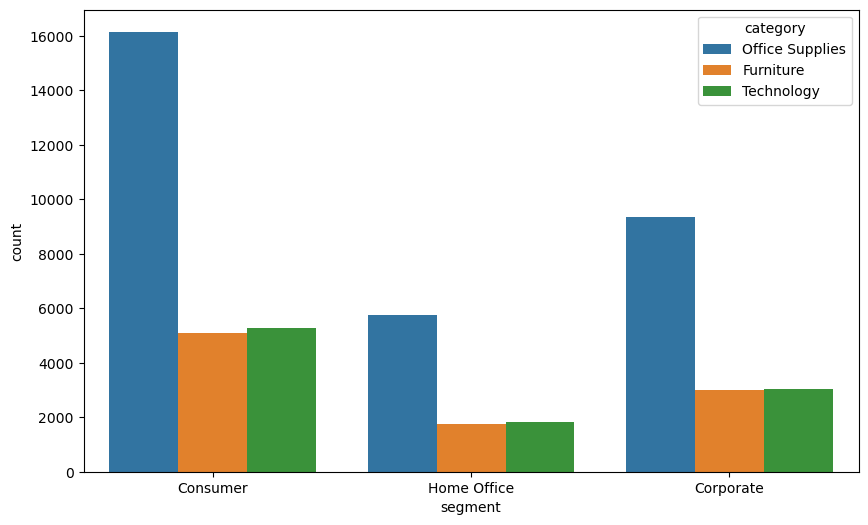

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(df['segment'],hue=df['category'])
plt.show()

##### More number of Customers from Consumer segment bought Office Supplies Category Products

### Segment Vs Cost Price

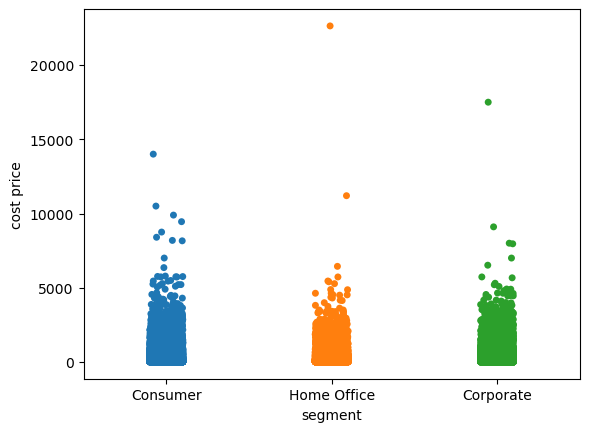

In [55]:
sns.stripplot(x=df['segment'],y=df['cost price'])
plt.show()

##### Highest Cost price for a product is bought by a customer who belongs to Home Office Segment

### Segment Vs Profit

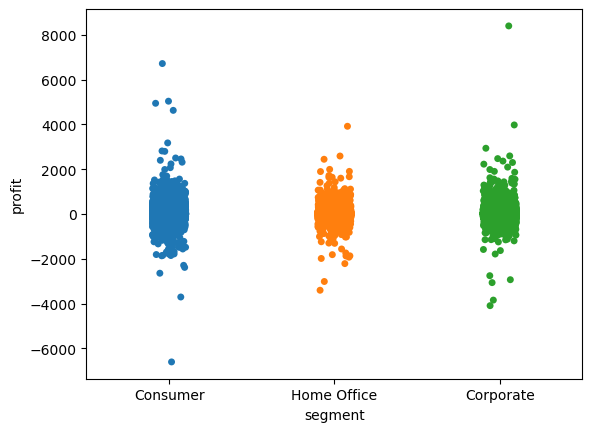

In [56]:
sns.stripplot(x=df['segment'],y=df['profit'])
plt.show()

##### A Product With High Loss belongs to Consumer Segment where a product with High Profit belongs to Corporate Segment

### Market

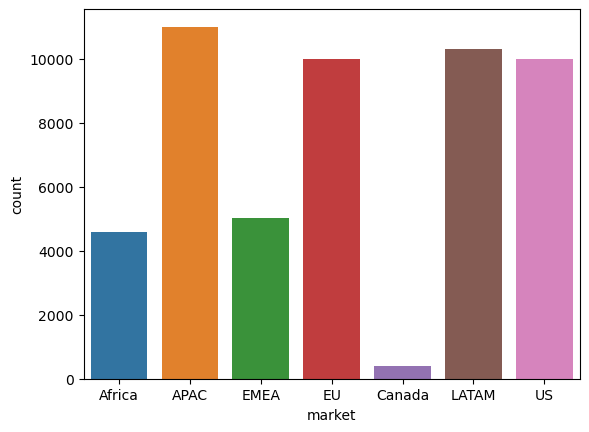

In [57]:
sns.countplot(df['market'])
plt.show()

##### This tells that, There are very less people purchasing products from the Canada Market.

##### More number of customers are purchasing products which belong to APAC Market.

### Market Vs Classes

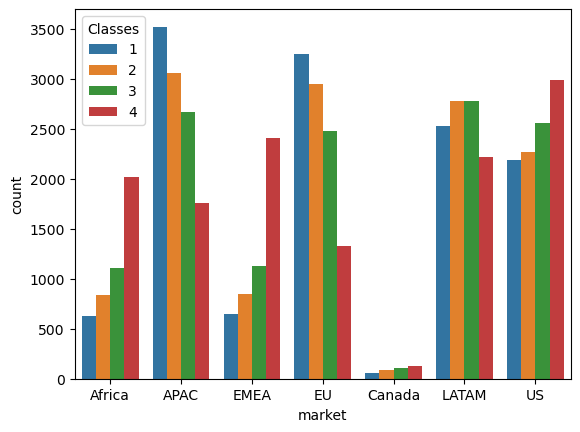

In [58]:
sns.countplot(df['market'],hue=df['Classes'])
plt.show()

##### More Products are from APAC Market and Highest Number of Highly Contributing People are purchasing Products from APAC Market

##### Highest Number of Least Contributing People are purchasing Products from US Market.

### Market Vs Category

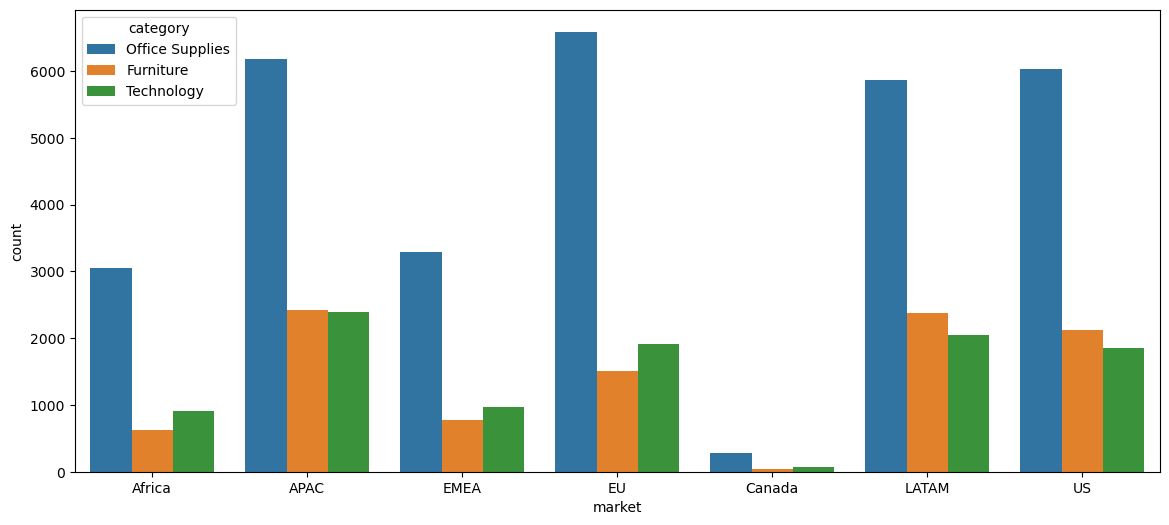

In [59]:
plt.figure(figsize=(14,6))
sns.countplot(df['market'],hue=df['category'])
plt.show()

##### Large Number of Office Supplies are from EU Market
##### All Category products are very Less in Canada Market.

### Market Vs Order Priority

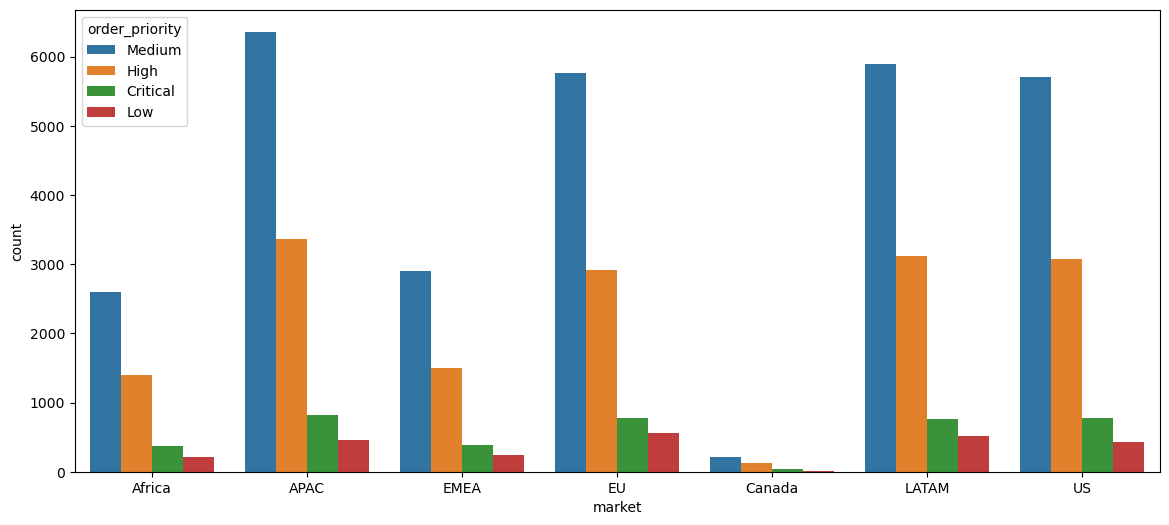

In [60]:
plt.figure(figsize=(14,6))
sns.countplot(df['market'],hue=df['order_priority'])
plt.show()

##### From all the markets, More number of Customers are giving Medium Order Priority.
##### And, Less number of Customers are giving Low Priority through all the markets.

### Market Vs Cost Price

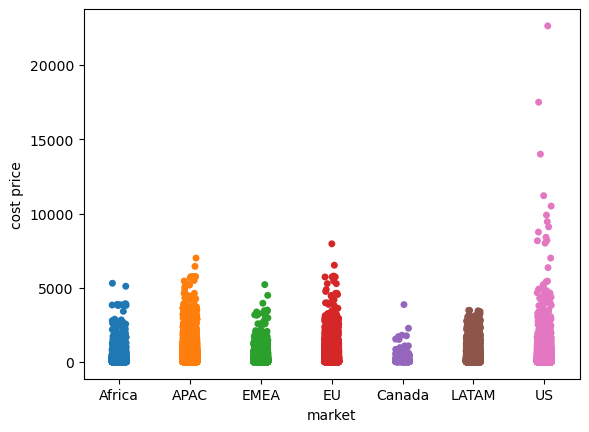

In [61]:
sns.stripplot(x=df['market'],y=df['cost price'])
plt.show()

##### The products from US Market has high Cost Price.

In [62]:
market_vs_costprice = df.groupby('market').mean()['cost price'].reset_index()
market_vs_costprice

,market,cost price
0,APAC,325.917481
1,Africa,170.868370
2,Canada,174.292109
3,EMEA,160.302508
4,EU,293.808906
5,LATAM,210.278334
6,US,229.858001


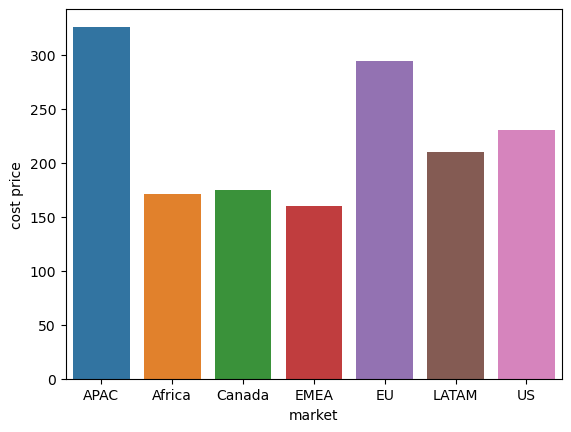

In [63]:
sns.barplot(market_vs_costprice['market'],market_vs_costprice['cost price'])
plt.show()

##### The mean Cost Price is High for APAC Market, that is, The mean cost price is high for the products that belong to APAC Market
##### The mean cost price is low for the products that belong to EMEA Market

### Market Vs Profit

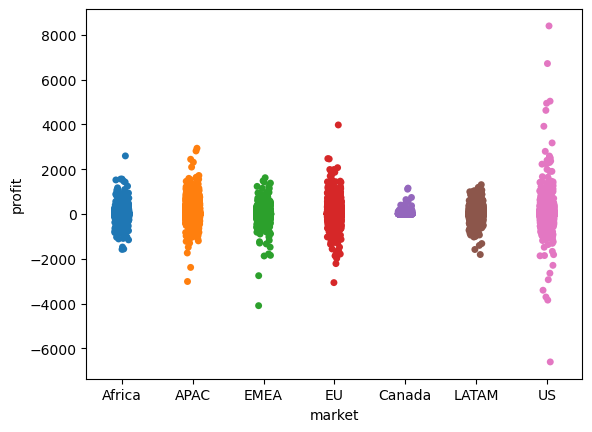

In [64]:
sns.stripplot(x=df['market'],y=df['profit'])
plt.show()

##### There are some products in the US Market, due to which there is high loss and high profit for the Business.

In [65]:
market_vs_profit = df.groupby('market').mean()['profit'].reset_index()
market_vs_profit

,market,profit
0,APAC,39.772549
1,Africa,19.374674
2,Canada,46.399453
3,EMEA,8.728966
4,EU,37.282974
5,LATAM,21.531328
6,US,28.656896


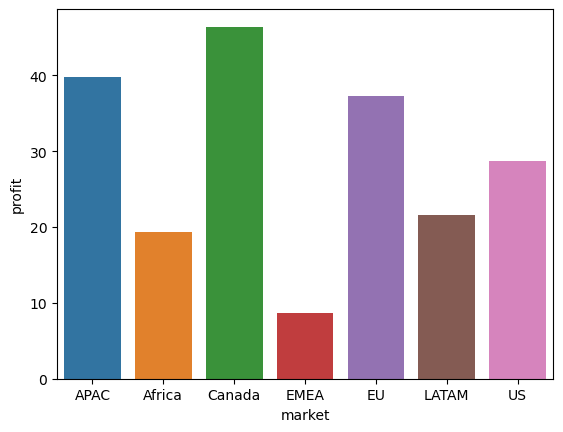

In [66]:
sns.barplot(market_vs_profit['market'],market_vs_profit['profit'])
plt.show()

##### Though the less of products from Canada, the mean Profit is High for products from Canada Market

#### Quality Is More Imp that Quantity

### Market Vs Days to Ship

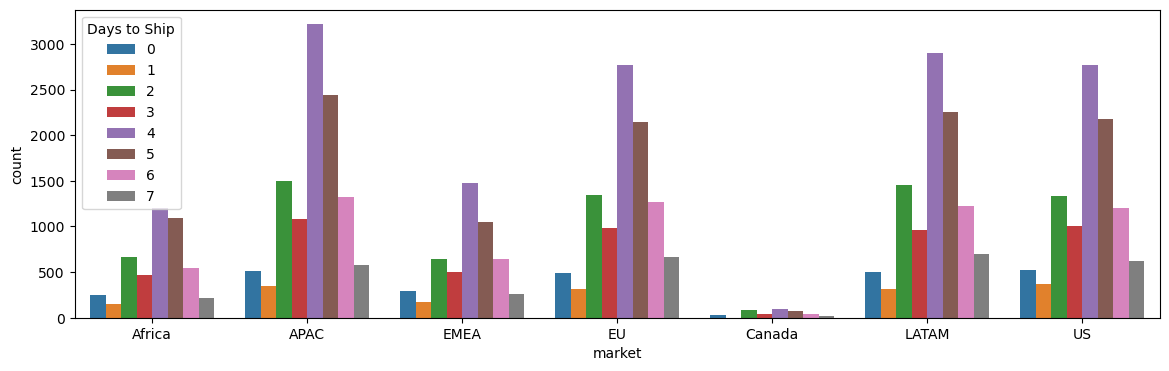

In [67]:
plt.figure(figsize=(14,4))
sns.countplot(df['market'],hue=df['Days to Ship'])
plt.show()

##### On the Whole, More number of Products take 4 days to get delivered, irrespective of the Market.

### Region

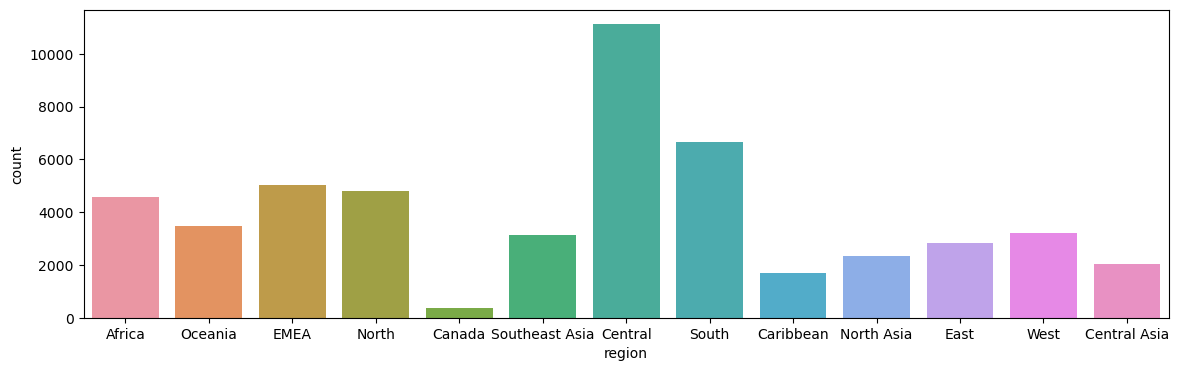

In [68]:
plt.figure(figsize=(14,4))
sns.countplot(df['region'])
plt.show()

##### More Number of Customers are from Central Region
##### Least Number of Customers are from Canada

### Region Vs Classes

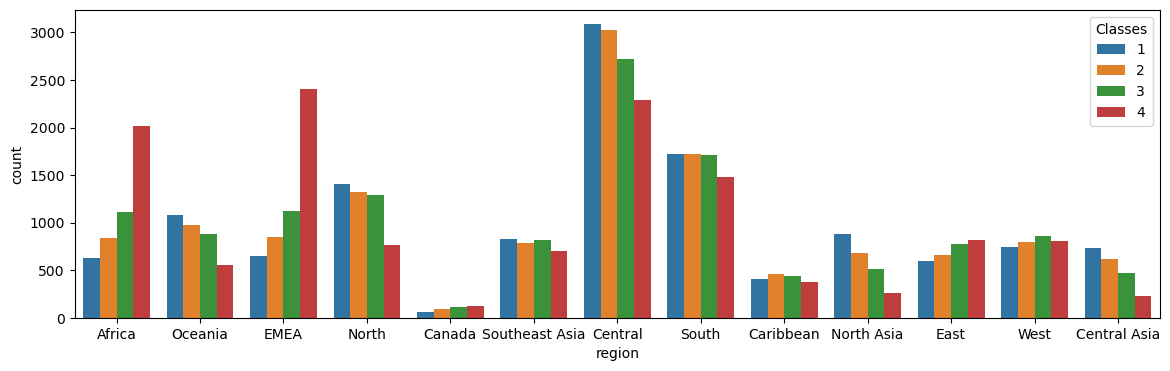

In [69]:
plt.figure(figsize=(14,4))
sns.countplot(df['region'],hue=df['Classes'])
plt.show()

##### There are more number highly contributing customers from Central Region.

##### More number of Least Contributing Customers are from Africa.

### Region Vs Profit

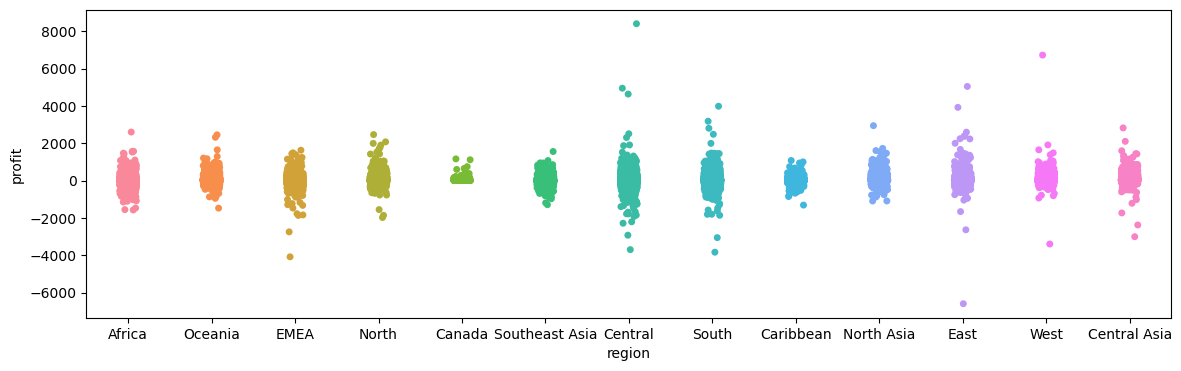

In [70]:
plt.figure(figsize=(14,4))
sns.stripplot(df['region'],df['profit'])
plt.show()

##### Highest Profit is with the Product delivered to the Central Region.
##### Highest Loss is with the Product delivered to the customer belongs to East Region.

In [71]:
region_vs_profit = df.groupby(df['region']).mean()['profit'].reset_index()
region_vs_profit

,region,profit
0,Africa,19.374674
1,Canada,46.399453
2,Caribbean,20.456403
3,Central,28.011512
4,Central Asia,64.687591
5,EMEA,8.728966
6,East,32.135808
7,North,40.668329
8,North Asia,70.820539
9,Oceania,34.891495


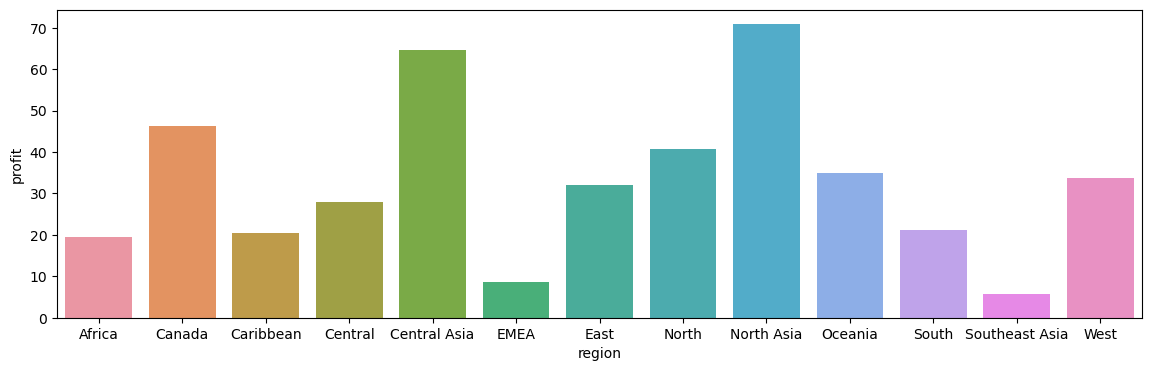

In [72]:
plt.figure(figsize=(14,4))
sns.barplot(region_vs_profit['region'],region_vs_profit['profit'])
plt.show()

##### Though the Customers from Canada are less, the mean profit for South East Asia is Less.
##### The mean profit is high for the Customers who belong to North Asia.

### Category

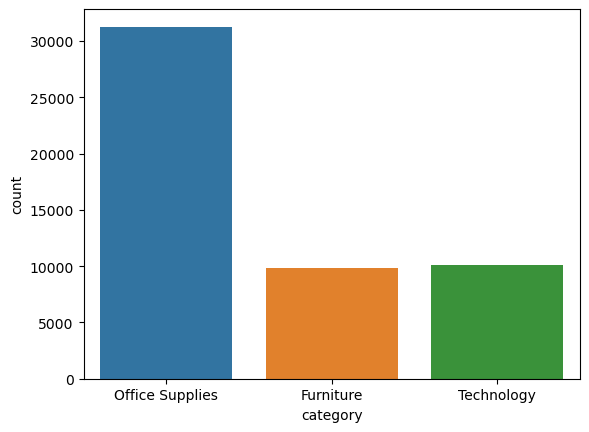

In [73]:
sns.countplot(df['category'])
plt.show()

##### More number of Products are brought from Office Supply Category and the number of products from Furniture and Technology Category are almost equal in number

### Category Vs Classes

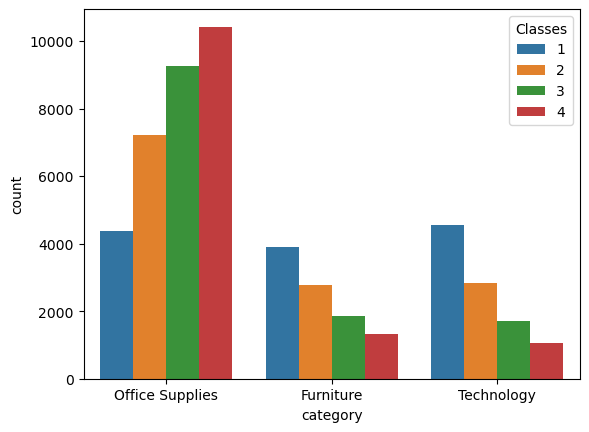

In [74]:
sns.countplot(df['category'],hue=df['Classes'])
plt.show()

##### More Number of Customers are purchasing products from Office Supplies Category.

### Category Vs Profit

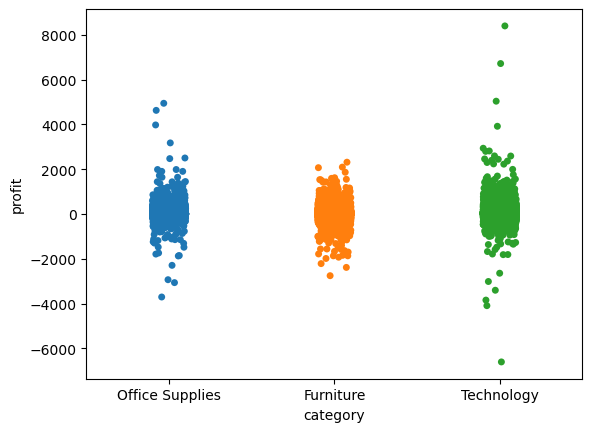

In [75]:
sns.stripplot(df['category'],df['profit'])
plt.show()

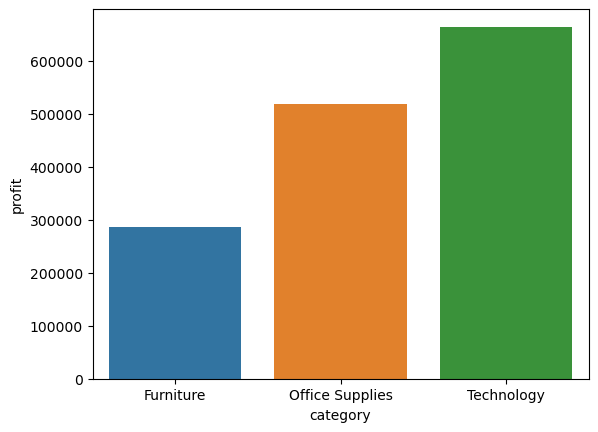

In [76]:
sns.barplot(df.groupby(['category']).sum()['profit'].reset_index()['category'],df.groupby(['category']).sum()['profit'].reset_index()['profit'])
plt.show()

##### There is more profit with the Technology Category Products

### Order Priority

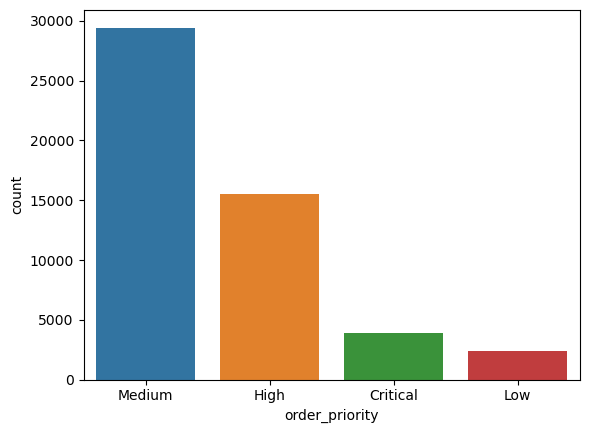

In [77]:
sns.countplot(df['order_priority'])
plt.show()

##### More number of Customers ordering products with Medium Priority
##### Least Number of Customers ordering products with Low Priority

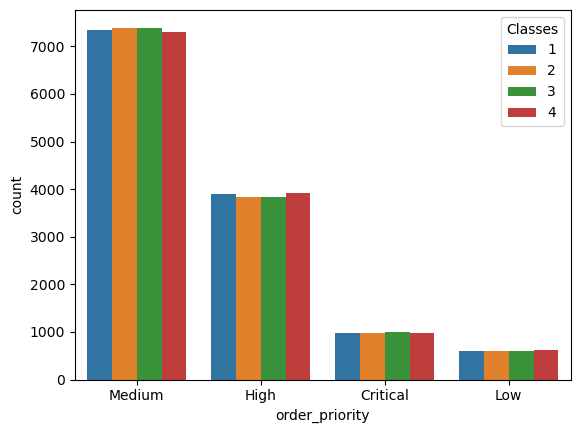

In [78]:
sns.countplot(df['order_priority'],hue=df['Classes'])
plt.show()

##### Number of Least and High contributing people are same all the order priorities.

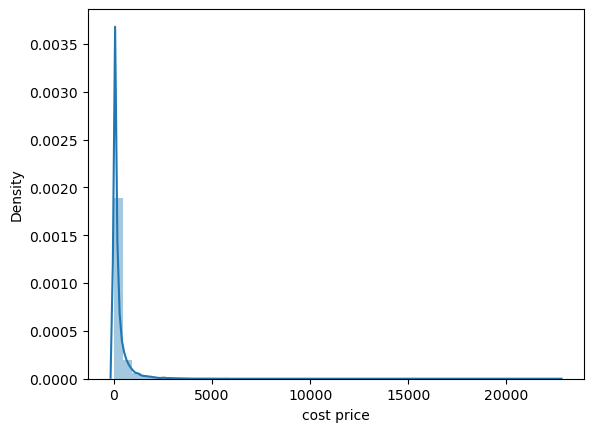

In [79]:
sns.distplot(df['cost price'])
plt.show()

In [80]:
df['cost price'].skew()

8.13808002122054

##### Cost Price is Highly Positve and Right Skewed. So it must be transformed

### Cost Price Vs Profit

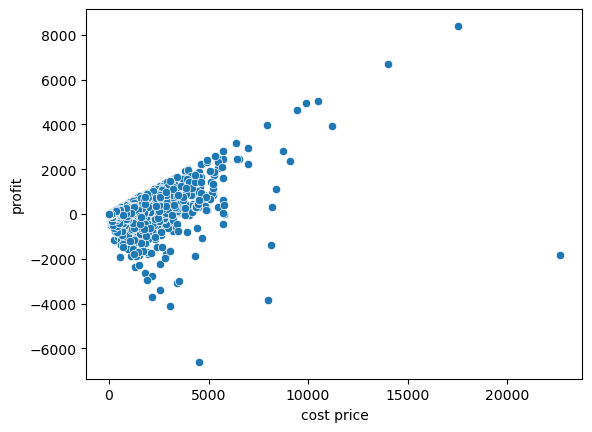

In [81]:
sns.scatterplot(df['cost price'],df['profit'])
plt.show()

##### As the cost price increases, there is an increase in the profit.

### Cost Vs Classes

In [82]:
cost_vs_classes = df.groupby(['Classes']).mean()['cost price'].reset_index()
cost_vs_classes

,Classes,cost price
0,1,734.098175
1,2,161.213696
2,3,61.839252
3,4,28.774652


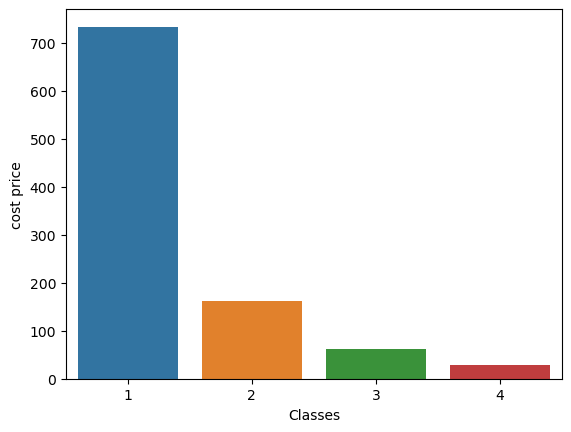

In [83]:
sns.barplot(cost_vs_classes['Classes'],cost_vs_classes['cost price'])
plt.show()

##### Here, the mean of Cost Price for Highly Contributing Customers is 734 USD .
##### The average of Cost Price for Least Contributing Customers is 28 USD.

### Quantity

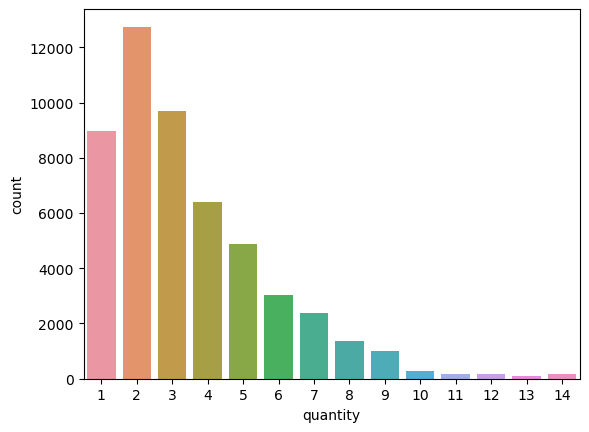

In [84]:
sns.countplot(x=df['quantity'])
plt.show()

##### More Number of Customers are Ordering 2 Pieces for a Product

### Quantity Vs Classes

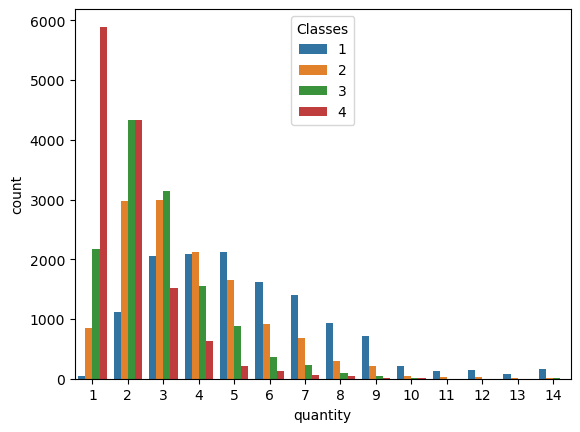

In [85]:
sns.countplot(df['quantity'],hue=df['Classes'])
plt.show()

##### We see that, the number of least contributing customers who are ordering less quantity.

### Discount Percent

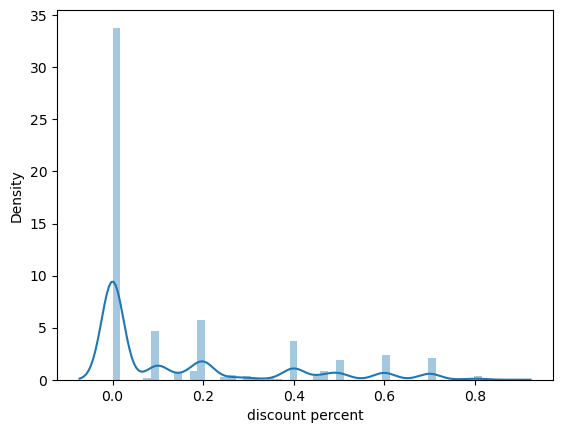

In [86]:
sns.distplot(df['discount percent'])
plt.show()

In [87]:
df['discount percent'].skew()

1.3877745521338385

In [88]:
df['discount percent'].unique()

array([0.   , 0.1  , 0.5  , 0.4  , 0.45 , 0.55 , 0.47 , 0.002, 0.6  ,
       0.2  , 0.8  , 0.17 , 0.25 , 0.7  , 0.402, 0.35 , 0.27 , 0.15 ,
       0.37 , 0.65 , 0.3  , 0.15 , 0.07 , 0.602, 0.32 , 0.202, 0.57 ,
       0.85 , 0.45 ])

In [89]:
max(df['discount percent'])

0.85

In [90]:
df['discount percent'].nunique()

29

##### However, Discount Percent is Numerical, And it ranges from 0.0 to 0.85 and only 29 unique values. So need not perfrom any transformation

### Profit

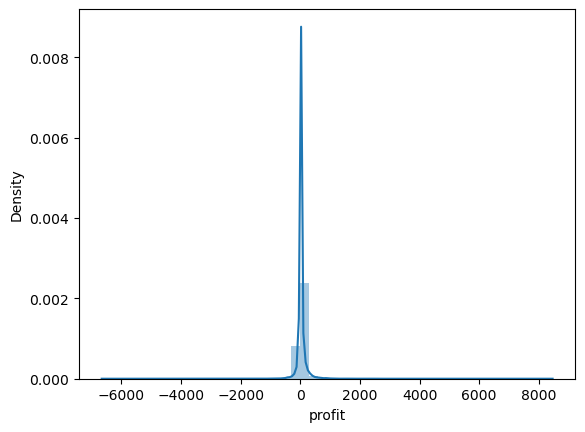

In [91]:
sns.distplot(df['profit'])
plt.show()

In [92]:
df['profit'].skew()

4.158187751396986

##### Profit needs transformation as the skewness is high.

### Profit Vs Classes

In [93]:
profit_vs_classes = df.groupby(['Classes']).mean()['profit'].reset_index()
profit_vs_classes

,Classes,profit
0,1,117.228960
1,2,14.588795
2,3,1.635680
3,4,-18.891700


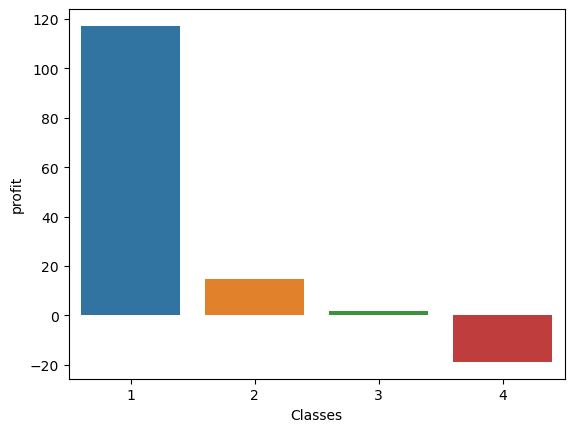

In [94]:
sns.barplot(profit_vs_classes['Classes'],profit_vs_classes['profit'])
plt.show()

##### Here, we can conclude that, The Mean Profit for High Contributing People is 117 USD
##### The mean Profit for Least Contributing People is -18 USD, which says that there is a mean loss of 18 USD

### Shipping Cost

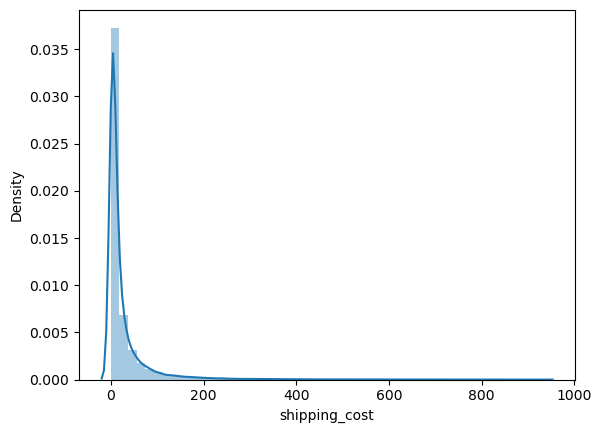

In [95]:
sns.distplot(df['shipping_cost'])
plt.show()

In [96]:
df['shipping_cost'].skew()

5.8632245214909435

##### It is RightSkewed. So need to Transformed.

### Shipping Cost Vs Classes

In [97]:
shippingcost_vs_classes = df.groupby(['Classes']).mean()['shipping_cost'].reset_index()
shippingcost_vs_classes

,Classes,shipping_cost
0,1,77.804534
1,2,17.749360
2,3,6.769597
3,4,3.175866


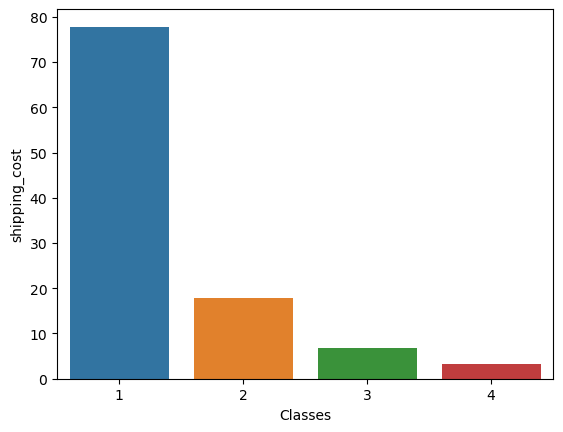

In [98]:
sns.barplot(shippingcost_vs_classes['Classes'],shippingcost_vs_classes['shipping_cost'])
plt.show()

##### Mean of Shipping Cost is High for Highly Contributing Customers and Less for Least Contributing Customers

### Days to Ship

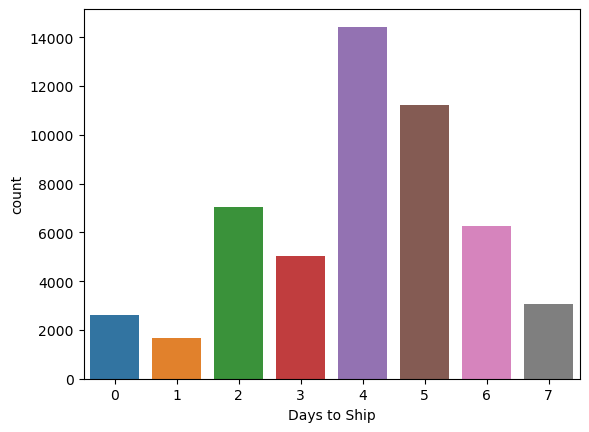

In [99]:
sns.countplot(df['Days to Ship'])
plt.show()

##### The Super Market is Taking Maximum 7 days to Deliver a Product

##### For most of the Customers the products are being delivered in 4 Days.

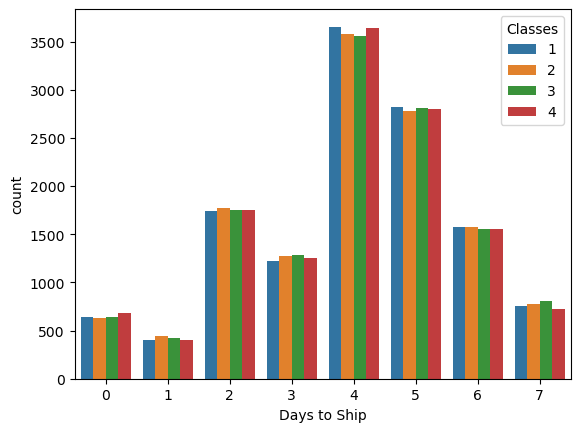

In [100]:
sns.countplot(df['Days to Ship'],hue=df['Classes'])
plt.show()

###### Equal number of Highly and Least Contributing Customers for Each Days to Ship the Product.

### Classes

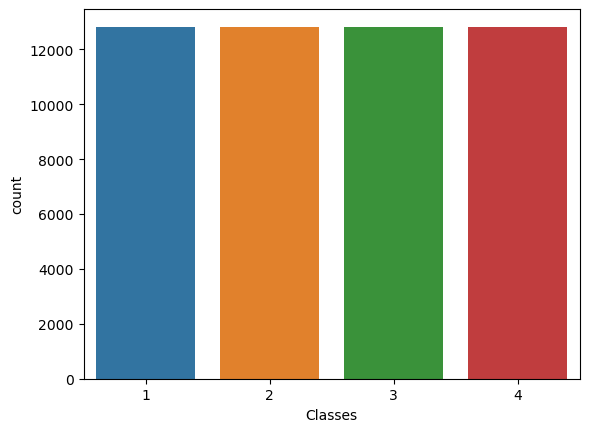

In [101]:
sns.countplot(df['Classes'])
plt.show()

In [102]:
df['Classes'].value_counts()

2    12824
1    12823
4    12823
3    12820
Name: Classes, dtype: int64

##### Equal Number of Records for each and every class. So it is Balanced

## Data PreProcessing

### Label Encoding For All the Categorical Features

In [103]:
df.select_dtypes('O').columns

Index(['ship_mode', 'segment', 'market', 'region', 'category',
       'order_priority'],
      dtype='object')

In [104]:
ship_mode_encoder = LabelEncoder()
df['ship_mode'] = ship_mode_encoder.fit_transform(df['ship_mode'])

segment_encoder = LabelEncoder()
df['segment'] = segment_encoder.fit_transform(df['segment'])

market_encoder = LabelEncoder()
df['market'] = market_encoder.fit_transform(df['market'])

region_encoder = LabelEncoder()
df['region'] = region_encoder.fit_transform(df['region'])

category_encoder = LabelEncoder()
df['category'] = category_encoder.fit_transform(df['category'])

order_priority_encoder = LabelEncoder()
df['order_priority'] = order_priority_encoder.fit_transform(df['order_priority'])


In [105]:
df.head()

,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,profit,shipping_cost,Days to Ship,Classes
0,3,0,1,0,1,3,408.300,2,0.0,106.140,35.46,5,1
1,3,0,0,9,1,3,120.366,3,0.1,36.036,9.72,7,2
2,2,0,3,5,1,1,66.120,4,0.0,29.640,8.17,4,2
3,2,2,4,7,1,1,44.865,3,0.5,-26.055,4.82,4,4
4,3,0,0,9,0,3,113.670,5,0.1,37.770,4.70,7,2


### Transformations for Continuous Features

In [106]:
log_cost_price = np.log(df['cost price'])
log_cost_price.skew()

0.07551786053299225

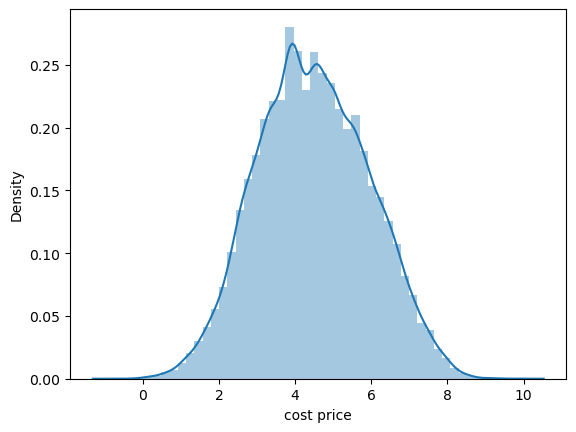

In [107]:
sns.distplot(log_cost_price)
plt.show()

#### Log Transformation is perfectly giving the Normal Distribution.

In [108]:
df['cost price'] = log_cost_price

In [109]:
log_shipping_cost = np.log(df['shipping_cost'])
log_shipping_cost.skew()

-0.02210829782596857

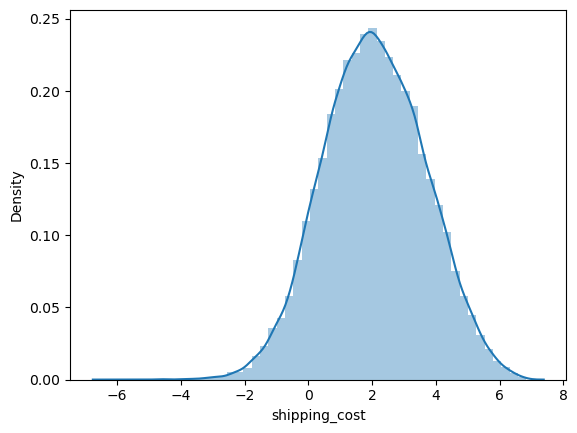

In [110]:
sns.distplot(log_shipping_cost)
plt.show()

In [111]:
df['shipping_cost']=log_shipping_cost

In [112]:
df.head(2)

,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,profit,shipping_cost,Days to Ship,Classes
0,3,0,1,0,1,3,6.012002,2,0.0,106.140,3.568405,5,1
1,3,0,0,9,1,3,4.790537,3,0.1,36.036,2.274186,7,2


##### Here profit is both negative and positive and we have added to the Selling Price before Classes Variable is Created. So we are dropping that here.

In [113]:
df.drop('profit',axis=1,inplace=True)

In [114]:
#sns.pairplot(df)
#plt.show()

In [115]:
df.corr()

,ship_mode,segment,market,region,category,order_priority,cost price,quantity,discount percent,shipping_cost,Days to Ship,Classes
ship_mode,1.000000,0.005935,-0.003953,-0.002691,-0.000562,0.404562,0.002676,0.004688,-0.009721,-0.163154,0.719340,-0.008799
segment,0.005935,1.000000,-0.003492,-0.010222,-0.001518,0.014027,0.000077,0.001593,-0.004460,-0.002504,0.006635,-0.000027
market,-0.003953,-0.003492,1.000000,0.055865,-0.023264,-0.000213,-0.101445,0.077911,-0.017332,-0.092730,0.006612,0.030859
region,-0.002691,-0.010222,0.055865,1.000000,-0.026347,-0.003372,0.055697,0.127454,0.028198,0.049464,-0.002431,-0.086437
category,-0.000562,-0.001518,-0.023264,-0.026347,1.000000,-0.006390,0.046664,-0.009578,-0.047841,0.043306,-0.003734,-0.040853
order_priority,0.404562,0.014027,-0.000213,-0.003372,-0.006390,1.000000,-0.001400,0.004435,0.005411,-0.240183,0.488164,-0.001448
cost price,0.002676,0.000077,-0.101445,0.055697,0.046664,-0.001400,1.000000,0.403163,-0.204172,0.908664,-0.001558,-0.861036
quantity,0.004688,0.001593,0.077911,0.127454,-0.009578,0.004435,0.403163,1.000000,-0.019875,0.362727,0.004347,-0.565544
discount percent,-0.009721,-0.004460,-0.017332,0.028198,-0.047841,0.005411,-0.204172,-0.019875,1.000000,-0.186483,-0.001507,0.348802
shipping_cost,-0.163154,-0.002504,-0.092730,0.049464,0.043306,-0.240183,0.908664,0.362727,-0.186483,1.000000,-0.158767,-0.781511


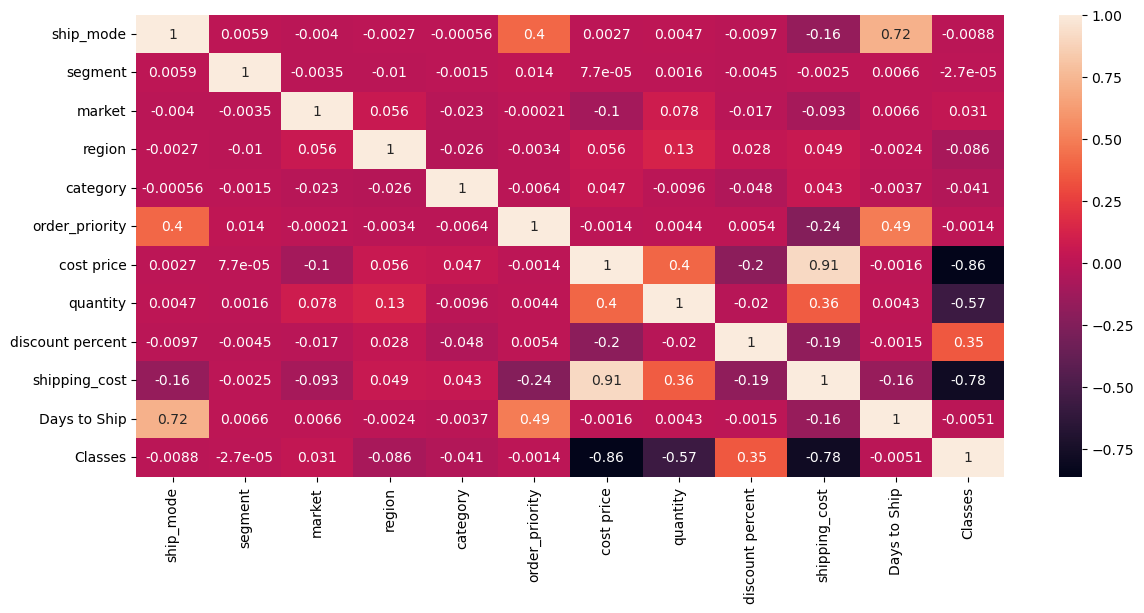

In [116]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### Here, the Days to Ship and Ship Mode have Muliti Collinearity. So dropping Ship_mode

In [117]:
df.drop('ship_mode',axis=1,inplace=True)

## Train Test Split

In [118]:
X = df.drop('Classes',axis=1)
y = df['Classes']

In [119]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

## Model Building

### Logistic Regression

In [120]:
model_lr = LogisticRegression(multi_class='multinomial')
model_lr.fit(x_train,y_train)

y_pred = model_lr.predict(x_test)

conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",conf_matrix)

acc_score = accuracy_score(y_test,y_pred)
print("\nAccuracy = ",acc_score)

print("\nRecall = ",recall_score(y_test,y_pred,average='macro'))

print('\nPrecision = ',precision_score(y_test,y_pred,average='macro'))

print('\nF1 Score = ',f1_score(y_test,y_pred,average='macro'))

Confusion Matrix
 [[3021  185    0    0]
 [ 177 2825  237    5]
 [   3  317 2513  317]
 [   3   10  381 2829]]

Accuracy =  0.8724947360212119

Recall =  0.8721663975109362

Precision =  0.8724704650079955

F1 Score =  0.8722453869619463


### K Nearest Neighbors

In [121]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)

y_pred = model_knn.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("\nAccuracy = ",acc_score)

print("\nRecall = ",recall_score(y_test,y_pred,average='macro'))

print('\nPrecision = ',precision_score(y_test,y_pred,average='macro'))

print('\nF1 Score = ',f1_score(y_test,y_pred,average='macro'))


Accuracy =  0.8016064883412618

Recall =  0.8014750881600167

Precision =  0.8055528725009891

F1 Score =  0.8025519521278025


### Support Vector Classifier

In [122]:
model_svc = SVC()
model_svc.fit(x_train,y_train)

y_pred = model_svc.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("\nAccuracy = ",acc_score)

print("\nRecall = ",recall_score(y_test,y_pred,average='macro'))

print('\nPrecision = ',precision_score(y_test,y_pred,average='macro'))

print('\nF1 Score = ',f1_score(y_test,y_pred,average='macro'))


Accuracy =  0.9304374951259455

Recall =  0.9305067868061809

Precision =  0.9316200068585374

F1 Score =  0.9307103633381157


### Decision Tree

In [123]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train,y_train)

y_pred = model_dtc.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("\nAccuracy = ",acc_score)

print("\nRecall = ",recall_score(y_test,y_pred,average='macro'))

print('\nPrecision = ',precision_score(y_test,y_pred,average='macro'))

print('\nF1 Score = ',f1_score(y_test,y_pred,average='macro'))


Accuracy =  0.9438508929267722

Recall =  0.9437034567585513

Precision =  0.9438354887623417

F1 Score =  0.9437595996579249


### Random Forest Classifier

In [124]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

y_pred = model_rf.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("\nAccuracy = ",acc_score)

print("\nRecall = ",recall_score(y_test,y_pred,average='macro'))

print('\nPrecision = ',precision_score(y_test,y_pred,average='macro'))

print('\nF1 Score = ',f1_score(y_test,y_pred,average='macro'))


Accuracy =  0.9516493800202761

Recall =  0.9515640812506913

Precision =  0.9516914595672199

F1 Score =  0.951606730363334


## Pyevals For Most Of the Classification Algorithms

In [125]:
#import pyevals

#Object = pyevals.build(x_train,x_test,y_train,y_test,'classification')
#Object.evaluate()

### From the Above We can Conclude That RandomForest Classifier is best Algorithm For this DataSet.

## Deployment

### Converting LabelEncoders to Pickle File So that can be used During Deployment

In [126]:
df.columns

Index(['segment', 'market', 'region', 'category', 'order_priority',
       'cost price', 'quantity', 'discount percent', 'shipping_cost',
       'Days to Ship', 'Classes'],
      dtype='object')

In [127]:
import pickle

# Segment Encoder

file = open('segment_encoder.pkl', 'wb')
pickle.dump(segment_encoder, file)
file.close()

# Market Encoder

file = open('market_encoder.pkl', 'wb')
pickle.dump(market_encoder, file)
file.close()

# Region Encoder

file = open('region_encoder.pkl', 'wb')
pickle.dump(region_encoder, file)
file.close()

# Category Encoder 

file = open('category_encoder.pkl', 'wb')
pickle.dump(category_encoder, file)
file.close()

# Order Priority Encoder

file = open('order_priority_encoder.pkl', 'wb')
pickle.dump(order_priority_encoder, file)
file.close()

## For Cost Price, Shipping Price :- Log of that Value is To be considered while taking Input

In [128]:
## Random Forest Classifier Model

file = open('RandomForestClassifier_Model.pkl', 'wb')
pickle.dump(model_rf, file)
file.close()
 

In [129]:
## seg_enc = pickle.load(open('segment_encoder.pkl', 'rb'))